<center><h1> DSCI 100: Group Project Report </center></h1>
    
<center><h3> Group 27: AJ Montajes, Alison, Michael, Haowei </center></h3>

<hr>

# 1. Introduction

Auditing is the examination of businesses financial records to determine if they align with standard accounting laws and principles (Hooda, 2018). Certain factors of a business or firm, such as historical discrepancy between a financial report and an audit inspection can help auditors identify those that are higher risk for fraudulent activity. This dataset contains information about 777 firms, each of which are either classified as “Fraud” or “Non-fraud” firms. In terms of features, we have 27 numeric features one of which is the binary "Risk"".

The dataset aims to aid in the auditing process, by providing insight into whether a particular firm is “high risk” (in which case auditors would want to visit the firm) or “low risk” (in which case auditors may skip visiting that firm). Some of the risk factors examined in the dataset include discrepancies in reports, historical discrepancy scores, and amounts of money involved in misstatements. With this dataset, we will implement a K-nearest-neighbors classification model to identify \"Fraud\" firms from unseen datasets. 

### 1a. Feature Descriptions

| **Inherent risk factors** |                                                                                               | **Control risk factors** |                                                                                     |
|-----------------------|-----------------------------------------------------------------------------------------------------|----------------------|-------------------------------------------------------------------------------------------|
| **Feature**           | Information                                                                                         | **Feature**          | Information                                                                               |
| Para A value          | Discrepancy found in the planned-expenditure of inspection and summary report A in Rs (in crore).   | Sector score         | Historical risk score value of the target-unit in the Table 1 using analytical procedure. |
| Para B value          | Discrepancy found in the unplanned-expenditure of inspection and summary report B in Rs (in crore). | Loss                 | Amount of loss suffered by the firm last year.                                            |
| Total                 | Total amount of discrepancy found in other reports Rs (in crore).                                   | History              | Average historical loss suffered by firm in the last 10¬†years.                           |
| Numbers                | Historical discrepancy score.                                                                       | District loss      | Historical risk score of a district in the last 10¬†years.                                |
| Money value           | Amount of money involved in misstatements in the past audits.                                       |                      |                                                                                           |


| **Other features**    |                                                                                                     |                      |                                                                                           |
|-----------------------|-----------------------------------------------------------------------------------------------------|----------------------|-------------------------------------------------------------------------------------------|
| **Feature**           | Information                                                                                         | **Feature**          | Information                                                                               |
| Sector ID             | Unique ID of the target sector.                                                                     | Location ID          | Unique ID of the city/province.                                                           |
| ARS                   | Total risk score using analytical procedure.                                                        |              |                                           |
| Risk class            | Risk Class assigned to an audit-case. (Target Feature) [0 = non-fraud, 1 = fraud]                                              |                      |                                                                                           |

Regarding datatypes, we have a mostly numeric features in our dataset, some of which (like our proposed target feature) are implicitly categorical. Throughout this report we will make it clear to the reader when and why we change the datatypes of our features

**Note.** The \"Inherent_Risk\" and \"Control_risk\" factors are the aggregated sums of the factors in the categories above.

We will use the K-nearest neighbour algorithm to build the classifier for our data. We want to find the number of neighbours that will give us the most accurate classification results. By first splitting the data into a training set and a test set, we can then split the training data into a sub training set and a validation set to perform a cross validation. Following this we will create a recipe, selecting Risk as our target class and Total, Inherent Risk, Money Value, History, Score Variables/Values and Location ID as our predictors. When creating our model using the KNN algorithm, we will set neighbours = tune() so that our cross validation can calculate an accuracy for multiple values of K. We will combine this model with the recipe into a workflow to train the classifier, then visualize the results (which number of neighbours is appropriate) by plotting the accuracy estimates against the number of neighbors. When building our KNN classifier for the dataset, we will use the number of neighbours will give us the most accurate predictions. 

### 1b. Predictive Question
How accurately can we classify the risk of firms using Total, Inherent Risk, Money Value, History, Score Variables/Values and Location ID as predictors?

### 1c. Predictor Justification
**Total:** Increase in total may indicate a higher chance involve in a fraudulent activity or misstatement.
**Inherent Risk:** Higher inherent risk meaning there is a higher inconsistencies in the past activities.
**Money value:** The amount of money encounter in the misstatement. Higher money value means more significant financial discrepancies.
**History:** The history of a firm’s loss in the past 10 years. A higher history score could increase the risk assessment.
**Score Variables/Values:** These scores and values provide accessibility to the overall risk instead of only measuring the financial discrepancies.
**Location ID:** To track the specific location of firm accurately.

The predictors above considered wide range of risks including financial discrepancies, historical activities, analyzed scores, and location. It covered various types of risks, so these are strong predictors

### 1d. Expected Outcomes and Significance 

From our work, we expect to find that Total, Inherent Risk, Money Value, History, Score Variables/Values and Location ID are strong predictors of whether or not a firm is fraudulent. 
We expect to find a method to accurately classify the unclassified firms as fraudulent or non-fraudulent firms. Our findings will reduce the workload for auditors by helping them easily classify firms into risky or non-risky, making their auditing process more efficient. Our findings may also reveal which factors are the most important to predicting the riskiness of various businesses and firms. Furthermore, our findings could help provide a guideline for companies to be audited on what activities and processes to avoid. 

Future work could also be done into classifying firms in good financial health and whether or not fraudulent activities are correlated with a firm's financial health. Another future question we could answer is whether or not these findings hold outside of India. Are the predictors that we used here equally effective in say the USA or Canada?

References: 
Audit data. UCI Machine Learning Repository. (n.d.). https://archive.ics.uci.edu/dataset/475/audit+data 

Hooda, N., Bawa, S., &amp; Rana, P. S. (2018). Fraudulent firm classification: A case study of an external audit. Applied Artificial Intelligence, 32(1), 48–64. https://doi.org/10.1080/08839514.2018.1451032 

<br>
<hr>

# 2. Methods and Results

## 2.a Loading Libraries
Throughout out this project, we will be employing the same libraries used in lectures.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(gridExtra)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### 2b. Reading Data & Reproducibility
Here we set our seed so that all psuedorandom functionalities are reproducible. We also read our risk dataset from our github repo using `read_csv`.

In [2]:
set.seed(234)
audit <- read_csv("https://raw.githubusercontent.com/montajesaj1/DSCI100-G27/main/audit_data/audit_risk.csv") 
head(audit)

New names:
• `Score_B` -> `Score_B...7`
• `Score_B` -> `Score_B...11`
Rows: 776 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): LOCATION_ID
dbl (26): Sector_score, PARA_A, Score_A, Risk_A, PARA_B, Score_B...7, Risk_B...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B...7,Risk_B,TOTAL,numbers,⋯,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5,⋯,0.4,0,0.2,0,2.4,8.574,0.4,0.5,1.7148,1
3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5,⋯,0.4,0,0.2,0,2.0,2.554,0.4,0.5,0.5108,0
3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5,⋯,0.4,0,0.2,0,2.0,1.548,0.4,0.5,0.3096,0
3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6,⋯,0.4,0,0.2,0,4.4,17.530,0.4,0.5,3.5060,1
3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5,⋯,0.4,0,0.2,0,2.0,1.416,0.4,0.5,0.2832,0
3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5,⋯,0.4,0,0.2,0,2.0,2.156,0.4,0.5,0.4312,0


### 2c. Tidying the Data and Changing Data-types
Since we have identified the `Risk` feature as our target, we want to change it's datatype to factor and perhaps the 1's and 0's to classes that are more meaningful. Lets call them "fraud" and "non-fraud". 

We also notice that there are many features with 27 in total, many of which share some relationships. Every feature beginning with `PARA_` refers to measures of discrepancy, `Score_` for some score variable. and `Risk_` to some risk variable. Therefore, we can tidy up this data set with several `pivot_longer` transformations.

In [3]:
audit <- audit |> mutate(Risk = as.factor(Risk), LOCATION_ID = as.factor(LOCATION_ID)) |>
    mutate(Risk = fct_recode(Risk, "Fraud" = "1", "Non-fraud" = "0"))

audit_tidy <- audit |> 
    select(-(starts_with("PARA_"))) |>
    select(-(starts_with("Score_"))) |> 
    select(-(starts_with("Risk_"))) 

# audit_tidy <- audit |>
#   pivot_longer(cols = starts_with("PARA_"), names_to = "discrepancy", values_to = "discrepancy_value") |>
#   pivot_longer(cols = starts_with("Score_"), names_to = "score_variable", values_to = "score_value") |>
#   pivot_longer(cols = starts_with("Risk_"), names_to = "risk_variable", values_to = "risk_value")

# audit_tidy_fct <- audit_tidy |>
    # mutate(score_variable = as.factor(score_variable))

head(audit_tidy)

Sector_score,LOCATION_ID,TOTAL,numbers,Money_Value,District_Loss,PROB,History,Prob,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
3.89,23,6.68,5,3.38,2,0.2,0,0.2,2.4,8.574,0.4,0.5,1.7148,Fraud
3.89,6,4.83,5,0.94,2,0.2,0,0.2,2.0,2.554,0.4,0.5,0.5108,Non-fraud
3.89,6,0.74,5,0.00,2,0.2,0,0.2,2.0,1.548,0.4,0.5,0.3096,Non-fraud
3.89,6,10.80,6,11.75,2,0.2,0,0.2,4.4,17.530,0.4,0.5,3.5060,Fraud
3.89,6,0.08,5,0.00,2,0.2,0,0.2,2.0,1.416,0.4,0.5,0.2832,Non-fraud
3.89,6,0.83,5,2.95,2,0.2,0,0.2,2.0,2.156,0.4,0.5,0.4312,Non-fraud


**Note.** new columns `risk_variable` and `risk_value` account for the previous risk variables and their associated scores when tidying the data. Likewise, `discrepancy` and `discrepancy_value` are for the initial PARA features tidied

### 2d. Exploratory Data Analysis
### Summary Tables

#### **Table 1:** Comparing counts for each class of the Target Feature
The table allows us to check if there are imbalances in class, which may effect the accuracy of the prediction.

In [4]:
table_1 <- audit_tidy |>
    group_by(Risk) |>
    summarize(Count = n())

table_1

Risk,Count
<fct>,<int>
Non-fraud,471
Fraud,305


#### **Table 2/3:** Summary Statistics on all Features and Missing Value Counts
Table 2: displays the descriptive statistics for all our numerical features whereas Table 3: displays the missing values in our dataset. In this case, we are only missing values for "money_value".

Something important to note is that there is a mild degree of class imbalance for our target feature. Below we can see that the number of Non-fradulent firms is 22,608, whereas the number of fradulent firms is 14,640 which means that our fraudulent firm class only accounts for 40% of all firms. This is something we will have to bear in mind when employing evaluation metrics down the road.

In [5]:
summary <- audit_tidy |>
    summary()
summary

  Sector_score    LOCATION_ID      TOTAL              numbers     
 Min.   : 1.85   8      : 76   Min.   :   0.0000   Min.   :5.000  
 1st Qu.: 2.37   19     : 68   1st Qu.:   0.5375   1st Qu.:5.000  
 Median : 3.89   9      : 53   Median :   1.3700   Median :5.000  
 Mean   :20.18   16     : 52   Mean   :  13.2185   Mean   :5.068  
 3rd Qu.:55.57   12     : 47   3rd Qu.:   7.7075   3rd Qu.:5.000  
 Max.   :59.85   5      : 44   Max.   :1268.9100   Max.   :9.000  
                 (Other):436                                      
  Money_Value      District_Loss        PROB           History      
 Min.   :  0.000   Min.   :2.000   Min.   :0.2000   Min.   :0.0000  
 1st Qu.:  0.000   1st Qu.:2.000   1st Qu.:0.2000   1st Qu.:0.0000  
 Median :  0.090   Median :2.000   Median :0.2000   Median :0.0000  
 Mean   : 14.138   Mean   :2.505   Mean   :0.2062   Mean   :0.1044  
 3rd Qu.:  5.595   3rd Qu.:2.000   3rd Qu.:0.2000   3rd Qu.:0.0000  
 Max.   :935.030   Max.   :6.000   Max.   :0.6000 

In [6]:
missing_values_counts <- audit_tidy |>
  select(where(~any(is.na(.)))) |>
  summarise(across(everything(), ~sum(is.na(.)), .names = "missing_count_{.col}"))

missing_values_counts

missing_count_Money_Value
<int>
1


**Note.** There is only one feature missing values `Money_value` 

### 2.e Investigative Plots

#### Plot 1: Scatter Plot [Total vs Inherent Risk]
Displays the relationship betweent total discrepancies in reports and inherent risk.

Warning message:
“Transformation introduced infinite values in continuous x-axis”


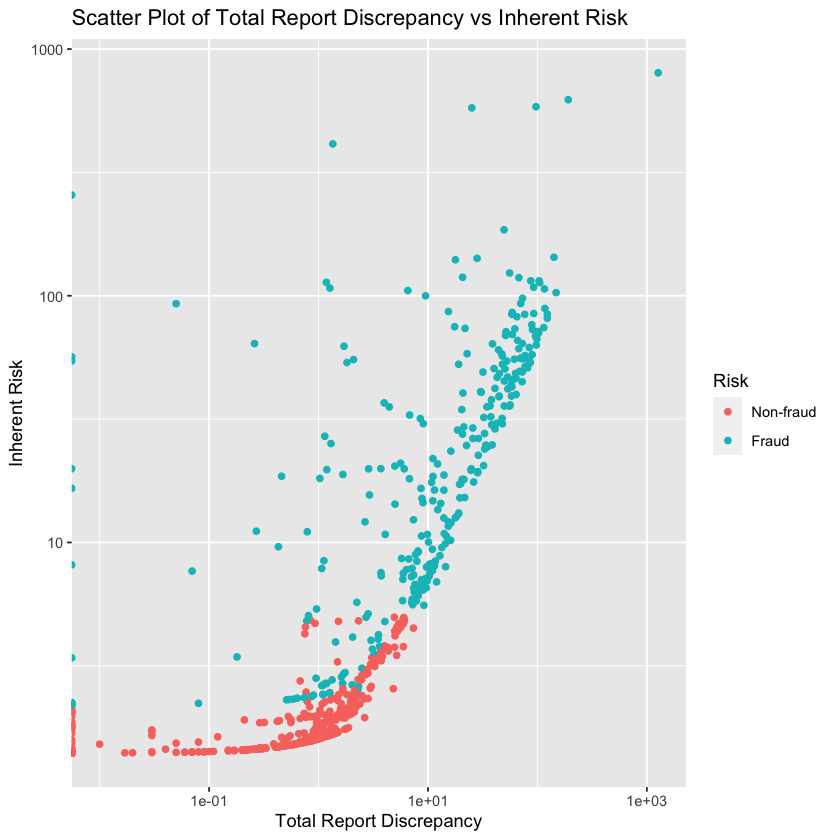

In [7]:
feature_plot1 <- audit_tidy |> ggplot(aes(x = TOTAL, y = Inherent_Risk, color = Risk)) + geom_point() + scale_x_log10() + scale_y_log10() +
    ggtitle('Scatter Plot of Total Report Discrepancy vs Inherent Risk') +
    xlab('Total Report Discrepancy') +
    ylab('Inherent Risk')

feature_plot1

#### Plot 2: Scatter Plot [Total vs Money Value]
Displays the correlation between total discrepancies in reports and money involved in the misstatement.

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


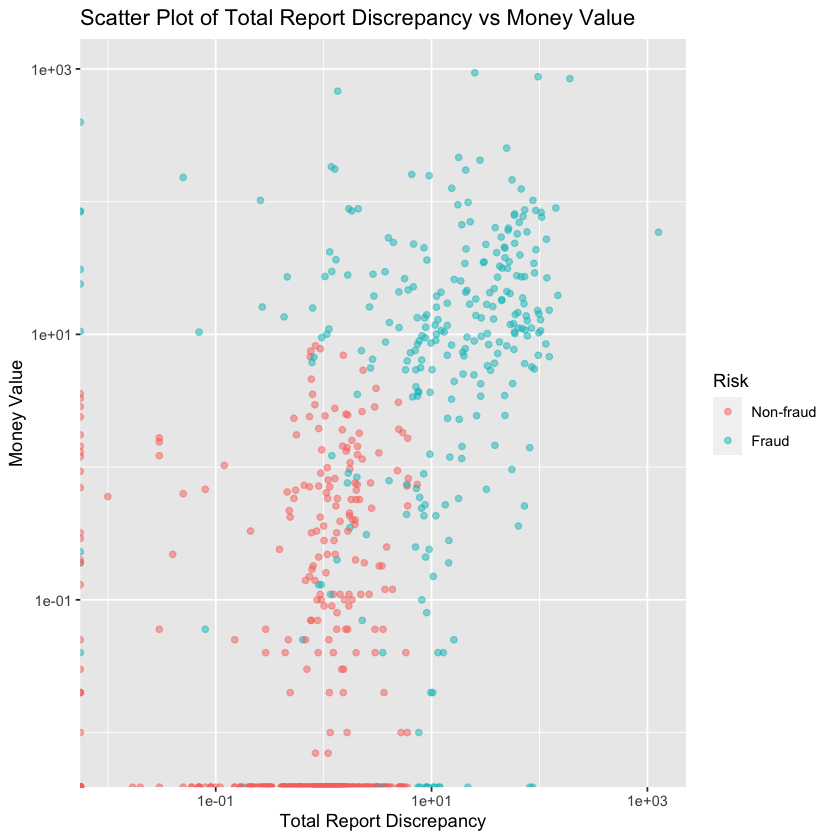

In [8]:
feature_plot2 <- ggplot(audit_tidy, aes(x = TOTAL, y = Money_Value)) +
  geom_point(aes(color = Risk), alpha = 0.5) +
  scale_x_log10() + scale_y_log10() +
  ggtitle('Scatter Plot of Total Report Discrepancy vs Money Value') +
  xlab('Total Report Discrepancy') +
  ylab('Money Value')

feature_plot2

#### Plot 3: Bar Chart [Location ID total counts showing Risk]
Shows the risk associated with firms at a given Location ID.

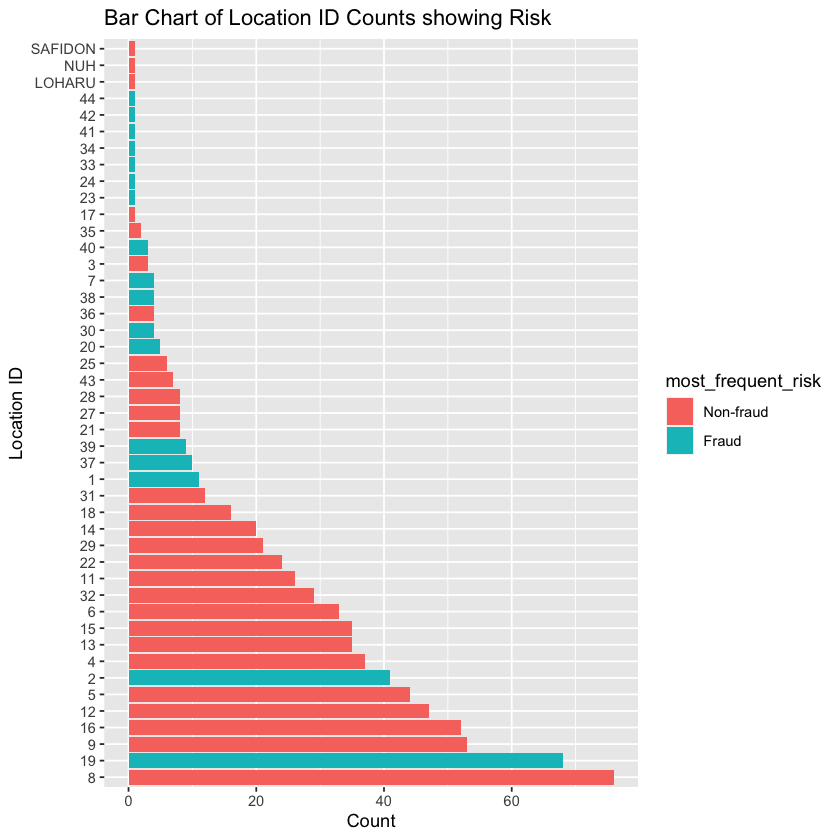

In [9]:
feature_plot3 <- audit_tidy |>
  group_by(LOCATION_ID, Risk) |>
  summarise(count = n(), .groups = "drop") |>
  group_by(LOCATION_ID) |>
  summarise(total = sum(count), most_frequent_risk = Risk[which.max(count)]) |>
  ungroup() |>
  mutate(LOCATION_ID = reorder(LOCATION_ID, -total)) |>
  ggplot(aes(y = LOCATION_ID, x = total, fill = most_frequent_risk)) +
    geom_bar(stat = "identity", position = "dodge") +
    ggtitle("Bar Chart of Location ID Counts showing Risk") +
    ylab("Location ID") +
    xlab("Count") 

feature_plot3

#### Plot 4: Bar Chart [Bar Chart of Score Variables and Corresponding Values showing Risk]
This plot visualizes the distribution of different score values and their respective score variables.

Warning message:
“Transformation introduced infinite values in continuous x-axis”


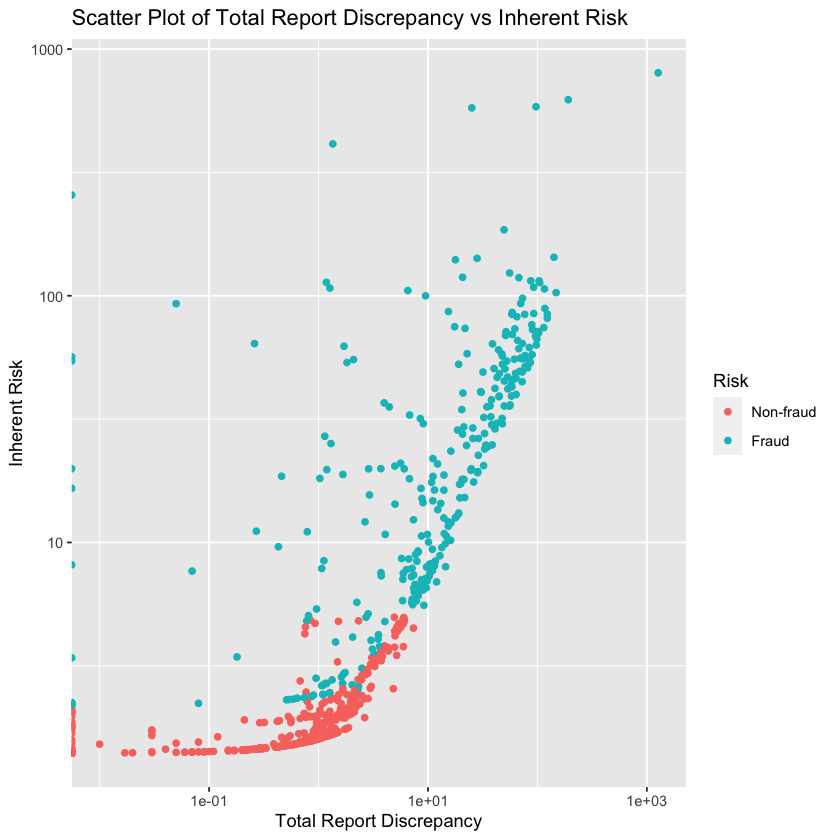

In [10]:
feature_plot4 <- audit_tidy |> ggplot(aes(x = TOTAL, y = Audit_Risk, color = Risk)) + geom_point() + scale_x_log10() + scale_y_log10() +
    ggtitle('Scatter Plot of Total Report Discrepancy vs Audit Risk') +
    xlab('Total Report Discrepancy') +
    ylab('Audit Risk')

feature_plot1

#### Plot 5: Bar Chart [Bar Chart of Discrepancy Variables and Corresponding Values showing Risk]
The plot visualizes the distribution of different types of discrepancy and different discrepancy variables, which is the planned expenditure or non-planed expenditure.

Warning message:
“Transformation introduced infinite values in continuous x-axis”


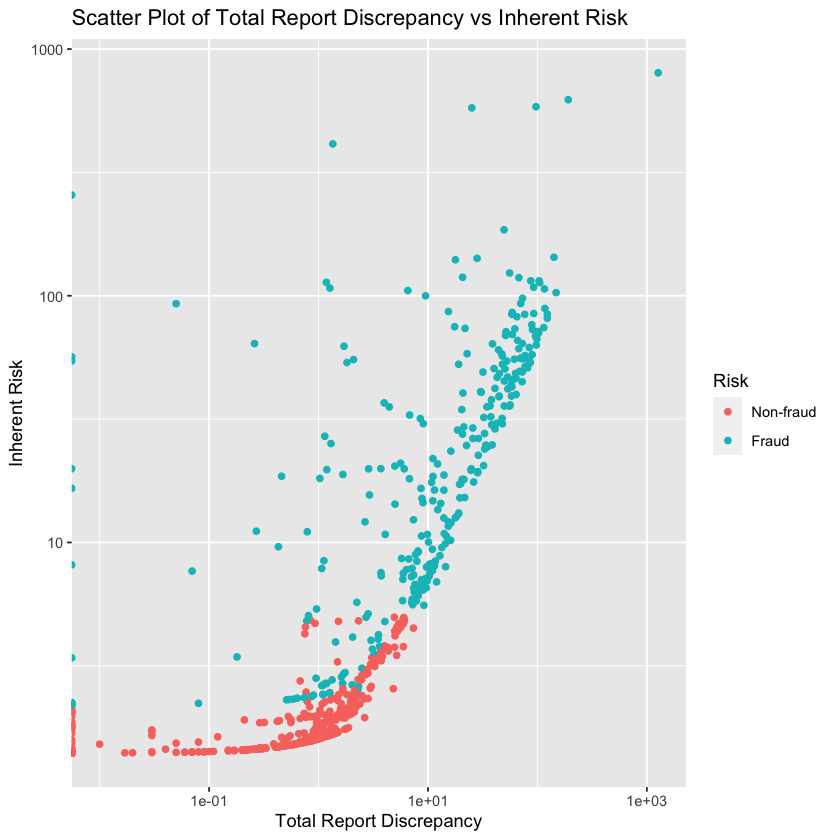

In [11]:
feature_plot5 <- audit_tidy |> ggplot(aes(x = TOTAL, y = Detection_Risk, color = Risk)) + geom_point() + scale_x_log10() + scale_y_log10() +
    ggtitle('Scatter Plot of Total Report Discrepancy vs Detection Risk') +
    xlab('Total Report Discrepancy') +
    ylab('Detection Risk')

feature_plot1

#### Plot 6: Bar Chart [Bar Chart of History vs District Loss]
Shows the relationship between district loss and average historical loss.

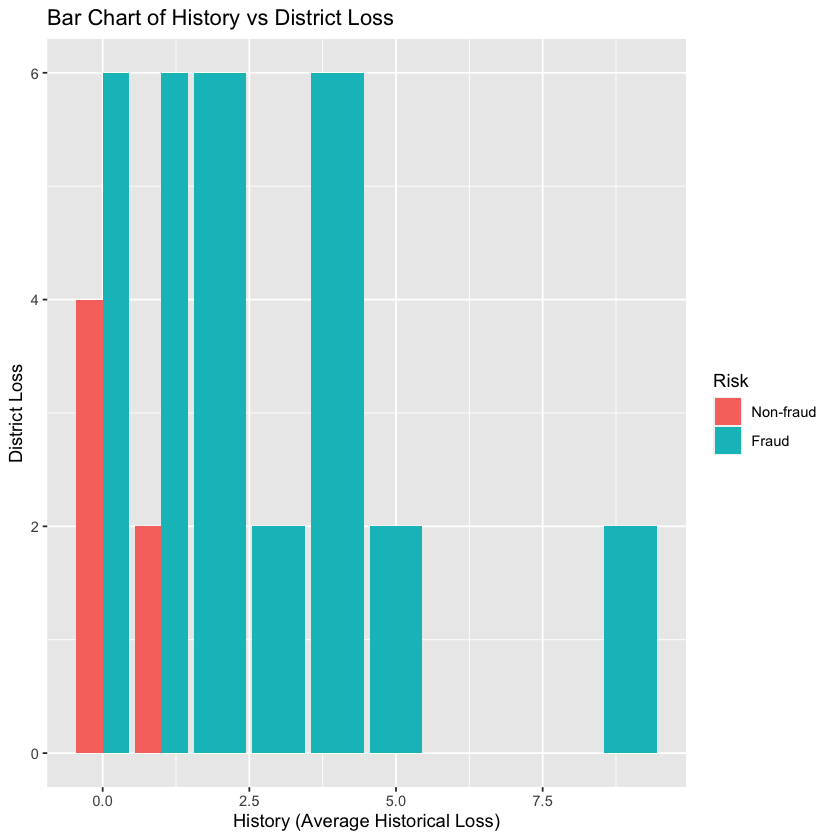

In [12]:
feature_plot6 <- audit_tidy |> ggplot(aes(x = History, y = District_Loss, fill = Risk)) + geom_bar(stat= "identity", position="dodge") +
    ggtitle('Bar Chart of History vs District Loss') +
    xlab('History (Average Historical Loss)') +
    ylab('District Loss')

feature_plot6

### 2f. Train/Test Split
We will now perform a 75% train test split on our data. 

In [13]:
risk_split <- initial_split(audit_tidy, prop = 0.75, strata = Risk)
risk_train <- training(risk_split)
risk_test <- testing(risk_split) 

### 2g. Constructing and Fitting KNN Model

As mentioned in the introduction, we will be using a KNN model. In this case, we will employ the `tidymodels` library to build our pipeline and specification. Before this, we can take a quick glimpse at the training data to see if there were any adverse effects of our tidying and feature engineering earlier.

In [14]:
glimpse(risk_train)
glimpse(risk_test)

Rows: 581
Columns: 15
$ Sector_score   <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3…
$ LOCATION_ID    <fct> 23, 8, 8, 8, 13, 37, 37, 37, 3, 4, 4, 14, 5, 20, 19, 19…
$ TOTAL          <dbl> 6.68, 20.53, 55.52, 13.10, 10.96, 40.17, 9.01, 51.64, 2…
$ numbers        <dbl> 5.0, 5.5, 5.0, 5.0, 5.0, 5.0, 5.5, 5.5, 5.0, 5.0, 5.0, …
$ Money_Value    <dbl> 3.38, 7.79, 0.96, 10.43, 9.00, 41.28, 14.03, 63.18, 205…
$ District_Loss  <dbl> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2…
$ PROB           <dbl> 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, …
$ History        <dbl> 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2…
$ Prob           <dbl> 0.2, 0.2, 0.4, 0.4, 0.2, 0.4, 0.2, 0.2, 0.4, 0.2, 0.2, …
$ Score          <dbl> 2.4, 4.2, 4.0, 3.6, 3.0, 4.2, 3.2, 4.4, 4.2, 4.0, 2.4, …
$ Inherent_Risk  <dbl> 8.574, 18.034, 35.704, 14.392, 9.384, 50.670, 14.492, 7…
$ CONTROL_RISK   <dbl> 0.4, 0.4, 1.2, 0.8, 0.4, 0.8, 0.4, 0.4, 0.8, 0.4, 0.4, …
$ Detection_Risk <

We can now build our Model Specification. For our neighbors hyperparameter, we will choose $K = 3$ to begin with and tune it later on depending on our results. We also specify that we are using the kknn engine to form a discrete classification prediction rather than a continuous regression prediction.

In [15]:
risk_recipe <- recipe(Risk ~ Inherent_Risk + Audit_Risk + Detection_Risk + Money_Value + History + LOCATION_ID, data = risk_train)
risk_recipe

risk_recipe <- risk_recipe |>
  step_impute_mean(all_numeric_predictors()) |>
  step_dummy(all_nominal(), -all_outcomes()) |>
  step_scale(all_numeric_predictors()) |>
  step_center(all_numeric_predictors())  
risk_recipe

# test_recipe <- recipe(Risk ~ TOTAL + Inherent_Risk + Money_Value + History + score_variable + score_value + LOCATION_ID, data = risk_test)
# risk_recipe

# test_recipe <- risk_recipe |>
#   step_dummy(all_nominal(), -all_outcomes()) |>
#   step_scale(all_numeric_predictors()) |>
#   step_center(all_numeric_predictors()) 
# test_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 6



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 6



── Operations 

• Mean imputation for: all_numeric_predictors()

• Dummy variables from: all_nominal(), -all_outcomes()

• Scaling for: all_numeric_predictors()

• Centering for: all_numeric_predictors()



In [16]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 3) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 3
  weight_func = rectangular

Computational engine: kknn 


In [17]:
knn_fit <- workflow() |>
      add_recipe(risk_recipe) |>
      add_model(knn_spec) |>
      fit(data = risk_train)

knn_fit

Warning message:
“Column(s) have zero variance so scaling cannot be used: `Detection_Risk`, `LOCATION_ID_X24`, `LOCATION_ID_X33`, `LOCATION_ID_X34` and `LOCATION_ID_SAFIDON`. Consider using `step_zv()` to remove those columns before normalizing”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_impute_mean()
• step_dummy()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(3,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.09810671
Best kernel: rectangular
Best k: 3

In [18]:
dim(risk_train)
dim(risk_test)

[1] 581  15

[1] 195  15

In [19]:
names(risk_train)
names(risk_test)

[1] "Sector_score"   "LOCATION_ID"    "TOTAL"          "numbers"       
 [5] "Money_Value"    "District_Loss"  "PROB"           "History"       
 [9] "Prob"           "Score"          "Inherent_Risk"  "CONTROL_RISK"  
[13] "Detection_Risk" "Audit_Risk"     "Risk"

[1] "Sector_score"   "LOCATION_ID"    "TOTAL"          "numbers"       
 [5] "Money_Value"    "District_Loss"  "PROB"           "History"       
 [9] "Prob"           "Score"          "Inherent_Risk"  "CONTROL_RISK"  
[13] "Detection_Risk" "Audit_Risk"     "Risk"

In [20]:
risk_test_predictions <- predict(knn_fit, risk_test) |>
    bind_cols(risk_test)

risk_test_predictions

.pred_class,Sector_score,LOCATION_ID,TOTAL,numbers,Money_Value,District_Loss,PROB,History,Prob,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
Non-fraud,3.89,6,4.83,5,0.94,2,0.2,0,0.2,2.0,2.554,0.4,0.5,0.5108,Non-fraud
Fraud,3.89,6,10.80,6,11.75,2,0.2,0,0.2,4.4,17.530,0.4,0.5,3.5060,Fraud
Fraud,3.89,7,8.51,5,44.95,2,0.2,0,0.2,3.2,31.774,0.4,0.5,6.3548,Fraud
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Non-fraud,55.57,12,0.00,5,0,2,0.2,0,0.2,2,1.400,0.4,0.5,0.2800,Non-fraud
Non-fraud,55.57,14,0.59,5,0,2,0.2,0,0.2,2,1.518,0.4,0.5,0.3036,Non-fraud
Non-fraud,55.57,36,0.02,5,0,2,0.2,0,0.2,2,1.404,0.4,0.5,0.2808,Non-fraud


# 3. Results and Model Evaluation

In [21]:
risk_test_predictions |>
  metrics(truth = Risk, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8769231


In [22]:
confusion <- risk_test_predictions |>
             conf_mat(truth = Risk, estimate = .pred_class)
confusion

           Truth
Prediction  Non-fraud Fraud
  Non-fraud       112    18
  Fraud             6    59

In [23]:
acc <- risk_test_predictions |>
  metrics(truth = Risk, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()

acc

[1] 0.8769231